In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import os
from PIL import Image
import cv2

np.random.seed(42)
tf.random.set_seed(42)

In [2]:
!gdown 1KPZtyey0H-q3fzDnHXO0qboEryu_eRCw -O emotion_emojis.zip

Downloading...
From (original): https://drive.google.com/uc?id=1KPZtyey0H-q3fzDnHXO0qboEryu_eRCw
From (redirected): https://drive.google.com/uc?id=1KPZtyey0H-q3fzDnHXO0qboEryu_eRCw&confirm=t&uuid=273c33d3-d1cb-4414-afc2-7429da2f276d
To: /content/emotion_emojis.zip
100% 55.3M/55.3M [00:00<00:00, 230MB/s]


In [3]:
!unzip emotion_emojis.zip

Archive:  emotion_emojis.zip
  inflating: Dataset_emocional/Feliz/happy_78.png  
  inflating: Dataset_emocional/Feliz/happy_99.png  
  inflating: Dataset_emocional/Feliz/happy_96.png  
  inflating: Dataset_emocional/Feliz/happy_89.png  
  inflating: Dataset_emocional/Feliz/happy_94.png  
  inflating: Dataset_emocional/Feliz/happy_95.png  
  inflating: Dataset_emocional/Feliz/happy_93.png  
  inflating: Dataset_emocional/Feliz/happy_85.png  
  inflating: Dataset_emocional/Feliz/happy_92.png  
  inflating: Dataset_emocional/Feliz/happy_82.png  
  inflating: Dataset_emocional/Feliz/happy_76.png  
  inflating: Dataset_emocional/Feliz/happy_73.png  
  inflating: Dataset_emocional/Feliz/happy_101.png  
  inflating: Dataset_emocional/Feliz/happy_81.png  
  inflating: Dataset_emocional/Feliz/happy_98.png  
  inflating: Dataset_emocional/Feliz/happy_75.png  
  inflating: Dataset_emocional/Feliz/happy_88.png  
  inflating: Dataset_emocional/Feliz/happy_77.png  
  inflating: Dataset_emocional/Fel

In [4]:
def load_mnist_data():
    (x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = keras.datasets.mnist.load_data()

    x_train_mnist = np.array([cv2.resize(img, (64, 64)) for img in x_train_mnist])
    x_test_mnist = np.array([cv2.resize(img, (64, 64)) for img in x_test_mnist])

    x_train_mnist = x_train_mnist.astype('float32') / 255.0
    x_test_mnist = x_test_mnist.astype('float32') / 255.0

    x_train_mnist = x_train_mnist.reshape(-1, 64, 64, 1)
    x_test_mnist = x_test_mnist.reshape(-1, 64, 64, 1)

    y_train_mnist = keras.utils.to_categorical(y_train_mnist, 10)
    y_test_mnist = keras.utils.to_categorical(y_test_mnist, 10)

    return (x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist)

(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = load_mnist_data()

In [5]:
def create_mnist_cnn():
    model = keras.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1), padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D((2, 2)),

        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(256, activation='relu', name='feature_layer'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),

        layers.Dense(10, activation='softmax', name='mnist_output')
    ])

    return model

mnist_model = create_mnist_cnn()

mnist_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']

)
mnist_model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ feature_layer (Dense)           │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mnist_output (Dense)            │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,194,570 (8.37 MB)

 Trainable params: 2,193,610 (8.37 MB)

 Non-trainable params: 960 (3.75 KB)

In [6]:
# Define callbacks
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True
)

reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=0.001
)

# Train the model
history_mnist = mnist_model.fit(
    x_train_mnist, y_train_mnist,
    batch_size=64,
    epochs=10,
    validation_data=(x_test_mnist, y_test_mnist),
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 25s 18ms/step - accuracy: 0.9365 - loss: 0.2135 - val_accuracy: 0.9858 - val_loss: 0.0416 - learning_rate: 0.0010
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9825 - loss: 0.0555 - val_accuracy: 0.9882 - val_loss: 0.0380 - learning_rate: 0.0010
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9871 - loss: 0.0426 - val_accuracy: 0.9870 - val_loss: 0.0416 - learning_rate: 0.0010
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9904 - loss: 0.0323 - val_accuracy: 0.9867 - val_loss: 0.0440 - learning_rate: 0.0010
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9915 - loss: 0.0283 - val_accuracy: 0.9914 - val_loss: 0.0260 - learning_rate: 0.0010
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9909 - loss: 0.0268 - val_accuracy: 0.9904 - val_loss: 0.0312 - learning_rate: 0.0010
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9931 - l

In [18]:
def load_emoji_dataset(data_dir):
    classes = ['Enojado', 'Feliz', 'Triste']
    class_to_idx = {cls: idx for idx, cls in enumerate(classes)}

    images = []
    labels = []

    for class_name in classes:
        class_dir = os.path.join(data_dir, class_name)
        if os.path.exists(class_dir):
            for filename in os.listdir(class_dir):
                if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
                    img_path = os.path.join(class_dir, filename)
                    try:
                        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                        if img is not None:
                            img = cv2.resize(img, (32, 32))
                            img = img.astype('float32') / 255.0
                            images.append(img)
                            labels.append(class_to_idx[class_name])
                    except Exception as e:
                        print(f"Error loading {img_path}: {e}")

    X = np.array(images).reshape(-1, 32, 32, 1)
    y = keras.utils.to_categorical(labels, len(classes))

    return X, y, classes

emoji_data_dir = r'Dataset_emocional'
X_emoji, y_emoji, emoji_classes = load_emoji_dataset(emoji_data_dir)

print(f"Emoji dataset shape: {X_emoji.shape}")
print(f"Class distribution: {np.sum(y_emoji, axis=0)}")

Emoji dataset shape: (809, 32, 32, 1)
Class distribution: [352. 192. 265.]


In [8]:
X_train_emoji, X_test_emoji, y_train_emoji, y_test_emoji = train_test_split(
    X_emoji, y_emoji, test_size=0.2, random_state=42, stratify=y_emoji
)

print(f"Emoji training set: {X_train_emoji.shape}")
print(f"Emoji test set: {X_test_emoji.shape}")

# Verify class distribution in the test set
test_class_counts = np.sum(y_test_emoji, axis=0)
print(f"Class distribution in test set: {test_class_counts}")

Emoji training set: (647, 64, 64, 1)
Emoji test set: (162, 64, 64, 1)
Class distribution in test set: [71. 38. 53.]


In [9]:
def create_transfer_learning_model(base_model, num_classes):
    dummy_input = tf.zeros((1, 64, 64, 1))
    _ = base_model(dummy_input)

    # Get all layers except the last one (classification layer)
    feature_layers = base_model.layers[:-1]

    # Create new input
    inputs = keras.Input(shape=(64, 64, 1))
    x = inputs

    # Apply all feature extraction layers
    for layer in feature_layers:
        layer.trainable = False  # Freeze the layer
        x = layer(x)

    # Add new classification layers
    x = layers.Dropout(0.3)(x)
    x = layers.Dense(256, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(num_classes, activation='softmax', name='emoji_output')(x)

    model = keras.Model(inputs, outputs)

    return model

emoji_model = create_transfer_learning_model(mnist_model, len(emoji_classes))

emoji_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

emoji_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 64, 64, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ feature_layer (Dense)           │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ emoji_output (Dense)            │ (None, 3)              │           771 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,259,587 (8.62 MB)

 Trainable params: 67,075 (262.01 KB)

 Non-trainable params: 2,192,512 (8.36 MB)

In [10]:
# Callbacks
early_stopping_emoji = keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=40,
    restore_best_weights=True
)

reduce_lr_emoji = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=10,
    min_lr=0.0001
)

# Train the model SIN datagen
history_emoji = emoji_model.fit(
    X_train_emoji,
    y_train_emoji,
    epochs=200,
    batch_size=32,
    validation_data=(X_test_emoji, y_test_emoji),
    callbacks=[early_stopping_emoji, reduce_lr_emoji],
    verbose=1
)


Epoch 1/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 253ms/step - accuracy: 0.3409 - loss: 1.4364 - val_accuracy: 0.3951 - val_loss: 1.5380 - learning_rate: 0.0010
Epoch 2/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4220 - loss: 1.3022 - val_accuracy: 0.4877 - val_loss: 1.1824 - learning_rate: 0.0010
Epoch 3/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4781 - loss: 1.1816 - val_accuracy: 0.3580 - val_loss: 1.1671 - learning_rate: 0.0010
Epoch 4/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5164 - loss: 1.1242 - val_accuracy: 0.5432 - val_loss: 0.9894 - learning_rate: 0.0010
Epoch 5/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4527 - loss: 1.2284 - val_accuracy: 0.6235 - val_loss: 0.9373 - learning_rate: 0.0010
Epoch 6/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5349 - loss: 1.0777 - val_accuracy: 0.6173 - val_loss: 0.9329 - learning_rate: 0.0010
Epoch 7/200
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5517 - loss: 1.0621 - val_

In [11]:
# Generate predictions and detailed metrics
y_pred_proba = emoji_model.predict(X_test_emoji)
y_pred = np.argmax(y_pred_proba, axis=1)
y_true = np.argmax(y_test_emoji, axis=1)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step


In [12]:
report = classification_report(
    y_true, y_pred,
    target_names=emoji_classes,
    digits=4
)
print(report)

              precision    recall  f1-score   support

     Enojado     0.7447    0.9859    0.8485        71
       Feliz     0.8889    0.4211    0.5714        38
      Triste     0.9000    0.8491    0.8738        53

    accuracy                         0.8086       162
   macro avg     0.8445    0.7520    0.7646       162
weighted avg     0.8293    0.8086    0.7918       162



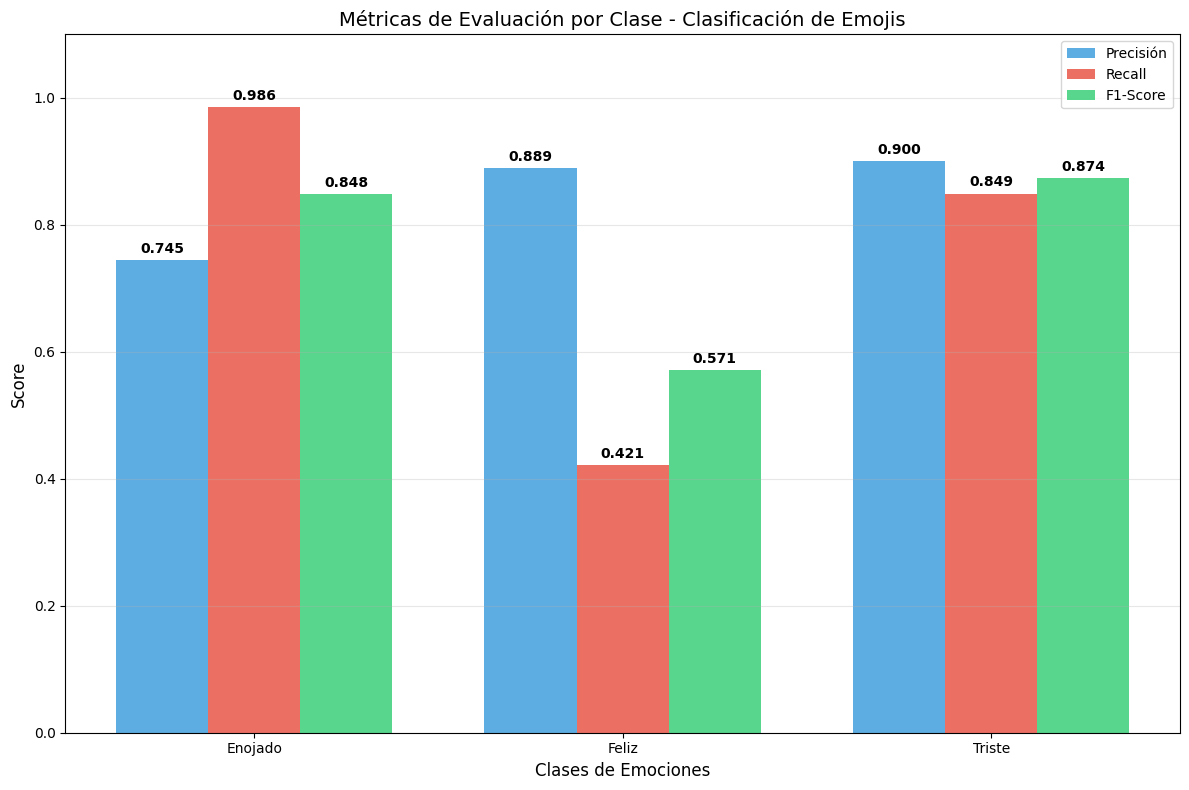

In [13]:
precision = precision_score(y_true, y_pred, average=None)
recall = recall_score(y_true, y_pred, average=None)
f1 = f1_score(y_true, y_pred, average=None)

fig, ax = plt.subplots(figsize=(12, 8))

x = np.arange(len(emoji_classes))
width = 0.25

bars1 = ax.bar(x - width, precision, width, label='Precisión', alpha=0.8, color='#3498db')
bars2 = ax.bar(x, recall, width, label='Recall', alpha=0.8, color='#e74c3c')
bars3 = ax.bar(x + width, f1, width, label='F1-Score', alpha=0.8, color='#2ecc71')

for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                   xy=(bar.get_x() + bar.get_width() / 2, height),
                   xytext=(0, 3),
                   textcoords="offset points",
                   ha='center', va='bottom',
                   fontsize=10, fontweight='bold')

ax.set_xlabel('Clases de Emociones', fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_title('Métricas de Evaluación por Clase - Clasificación de Emojis', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(emoji_classes)
ax.legend()
ax.grid(True, alpha=0.3, axis='y')
ax.set_ylim(0, 1.1)

plt.tight_layout()
plt.show()

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


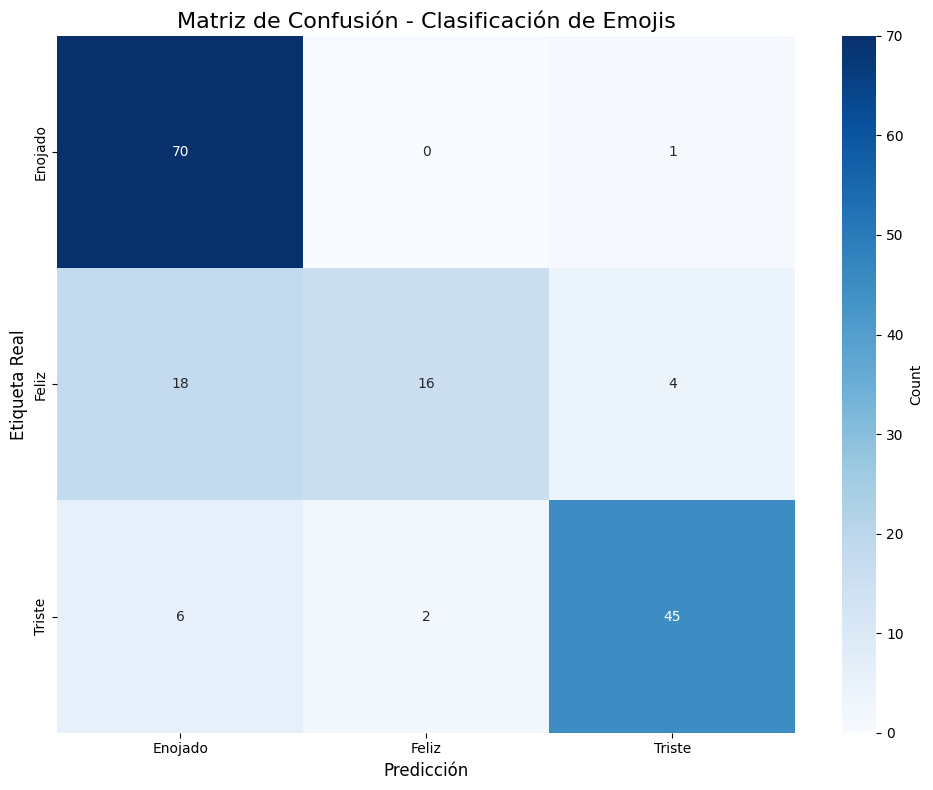

In [14]:
y_pred_proba = emoji_model.predict(X_test_emoji)
y_pred = np.argmax(y_pred_proba, axis=1)
y_true = np.argmax(y_test_emoji, axis=1)

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
           xticklabels=emoji_classes, yticklabels=emoji_classes,
           cbar_kws={'label': 'Count'})
plt.title('Matriz de Confusión - Clasificación de Emojis', fontsize=16)
plt.xlabel('Predicción', fontsize=12)
plt.ylabel('Etiqueta Real', fontsize=12)
plt.tight_layout()
plt.show()

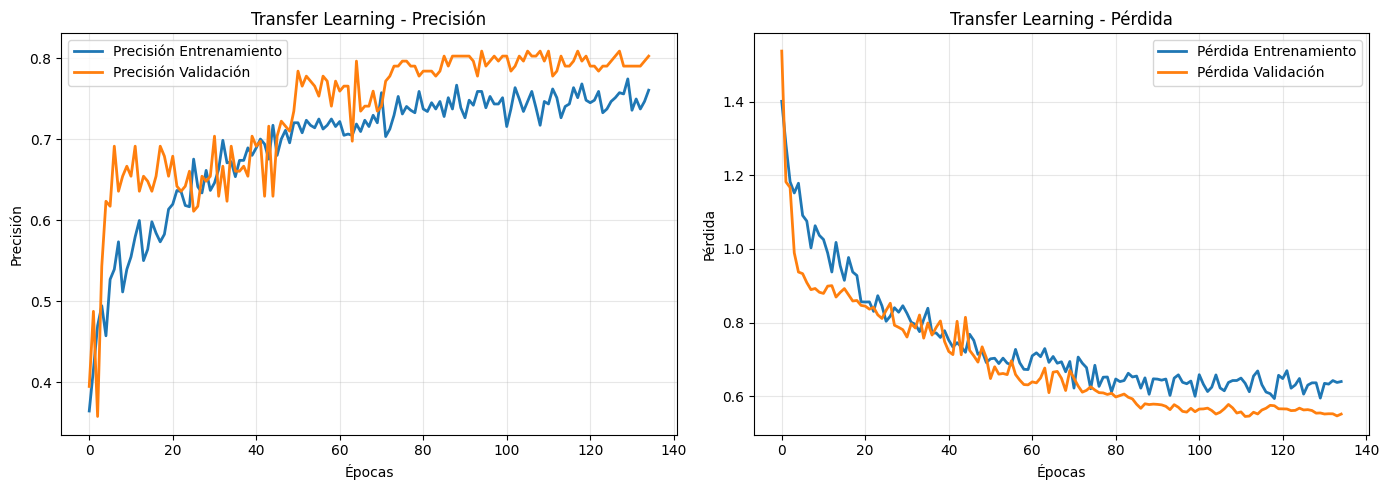

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(history_emoji.history['accuracy'], label='Precisión Entrenamiento', linewidth=2)
axes[0].plot(history_emoji.history['val_accuracy'], label='Precisión Validación', linewidth=2)
axes[0].set_title('Transfer Learning - Precisión')
axes[0].set_xlabel('Épocas')
axes[0].set_ylabel('Precisión')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].plot(history_emoji.history['loss'], label='Pérdida Entrenamiento', linewidth=2)
axes[1].plot(history_emoji.history['val_loss'], label='Pérdida Validación', linewidth=2)
axes[1].set_title('Transfer Learning - Pérdida')
axes[1].set_xlabel('Épocas')
axes[1].set_ylabel('Pérdida')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


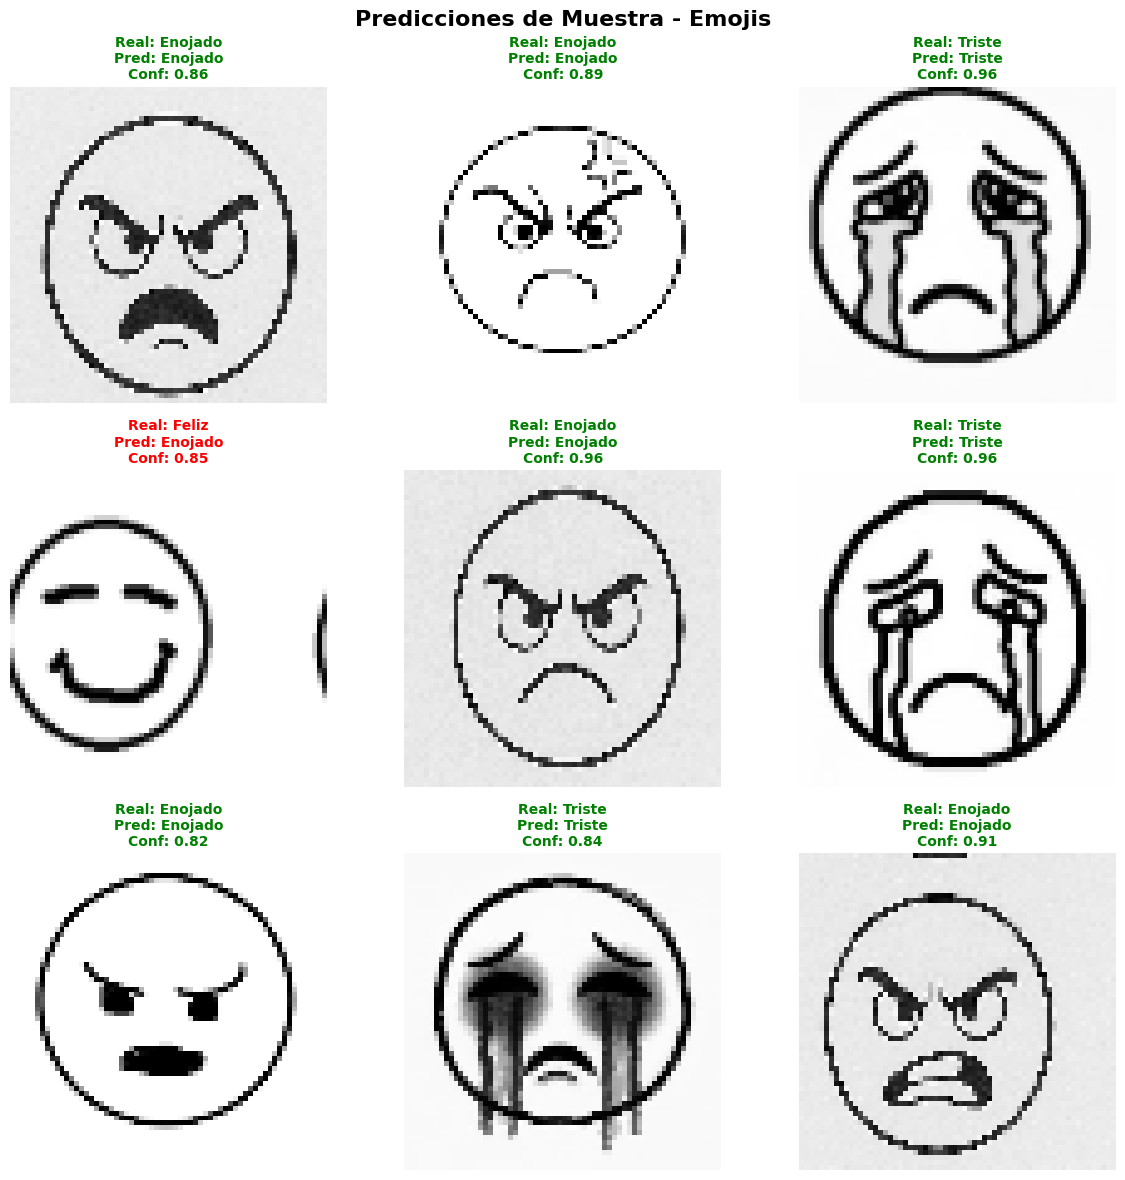

In [16]:
def show_sample_predictions(model, X_test, y_test, class_names, num_samples=9):
    indices = np.random.choice(len(X_test), num_samples, replace=False)

    fig, axes = plt.subplots(3, 3, figsize=(12, 12))
    axes = axes.ravel()

    for i, idx in enumerate(indices):
        # Get prediction
        img = X_test[idx]
        true_label = np.argmax(y_test[idx])
        pred_proba = model.predict(img.reshape(1, 64, 64, 1), verbose=0)
        pred_label = np.argmax(pred_proba)
        confidence = pred_proba[0][pred_label]

        # Plot image
        axes[i].imshow(img.squeeze(), cmap='gray')
        axes[i].axis('off')

        # Set title with prediction info
        color = 'green' if pred_label == true_label else 'red'
        title = f'Real: {class_names[true_label]}\nPred: {class_names[pred_label]}\nConf: {confidence:.2f}'
        axes[i].set_title(title, color=color, fontsize=10, fontweight='bold')

    plt.suptitle('Predicciones de Muestra - Emojis', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

# Show sample predictions
show_sample_predictions(emoji_model, X_test_emoji, y_test_emoji, emoji_classes)